## Time Series Visualization

Contents:
- Line Plots
- Histograms and Density Plots
- Box and Whisker Plots
- Heat Maps
- Lag Plots or Scatter Plots
- Autocorrelation Plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Line Plots

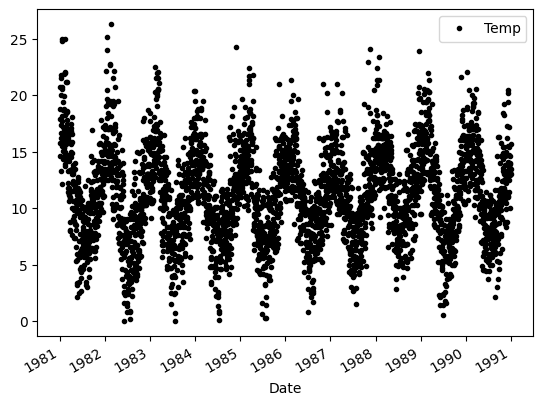

In [39]:
# Load the minimum daily temperatures dataset
# This dataset describes the minimum daily temperatures oer 10 years (1981-1990) in the city Melbourne
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True)

# Create a line plot
series.plot(style='k.') # black dashed line
plt.show()

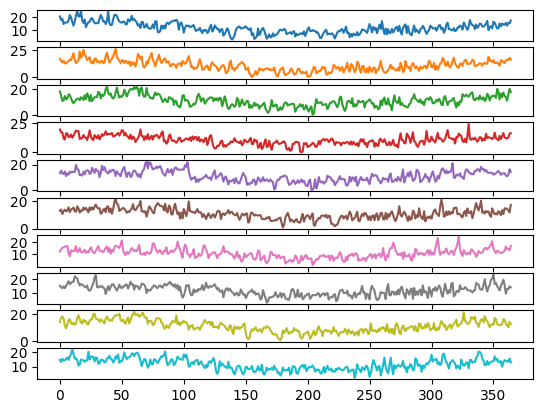

In [40]:
# Create a line plot for each year
groups = series.groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.ravel()
years.plot(subplots=True, legend=False)
plt.show()

### 2. Histogram and Density Plots

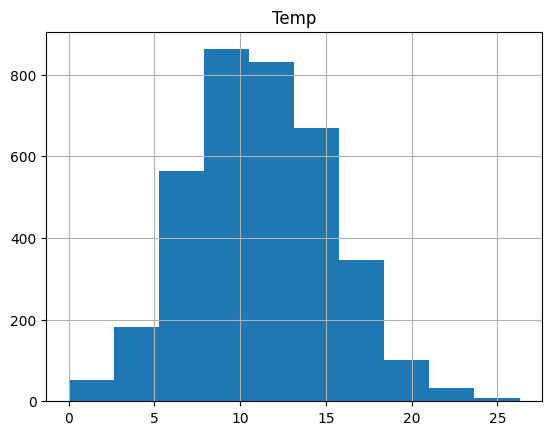

In [21]:
series.hist()
plt.show()

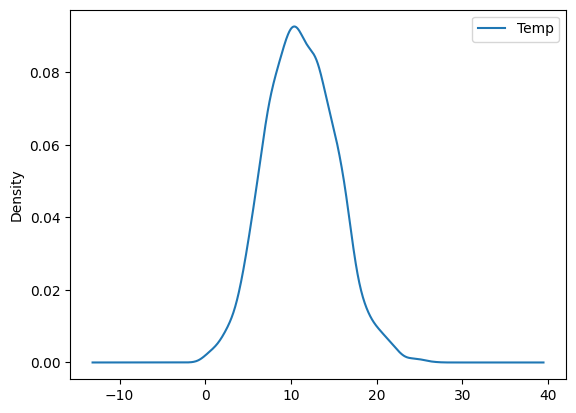

In [22]:
# Create a density plot
# it's like the histogram, except a function is used to fit the distribution of observations
# and a nice, smooth line is used to summarize the distribution
series.plot(kind='kde')
plt.show()

### 3. Box and Whisker Plots by Interval

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

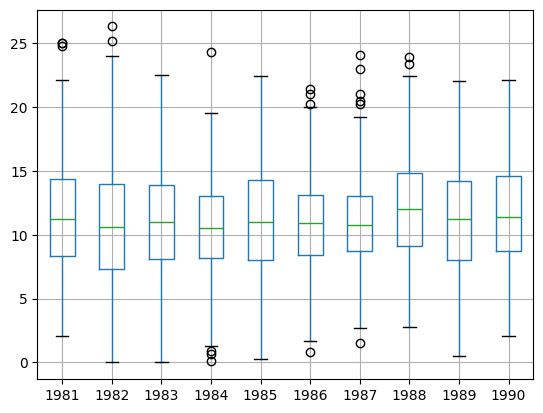

In [41]:
# Create a boxplot of yearly data
groups = series.groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.ravel()
years.boxplot()
plt.show()

In [26]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


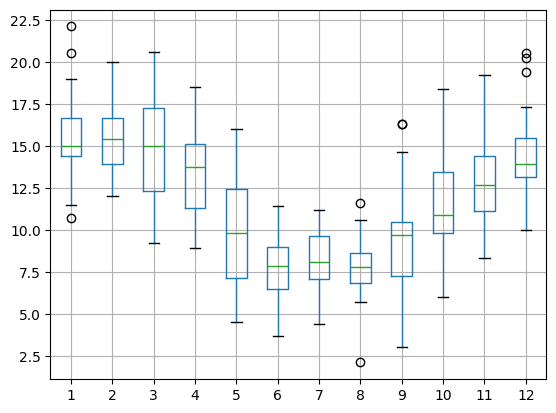

In [33]:
# Create a boxplot of monthly data
one_year = series.loc['1990']
groups = one_year.groupby(pd.Grouper(freq='ME'))
months = pd.concat([pd.DataFrame(x[1].values.ravel()) for x in groups], axis=1)
months.columns = range(1, 13)
months.boxplot()
plt.show()

### 4. Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).

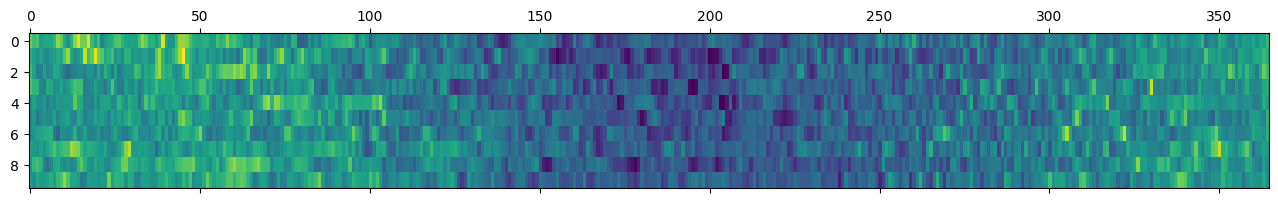

In [42]:
# Create a heat map of yearly data
groups = series.groupby(pd.Grouper(freq='YE'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.ravel()
years = years.T # each row represents one year and each column one day
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

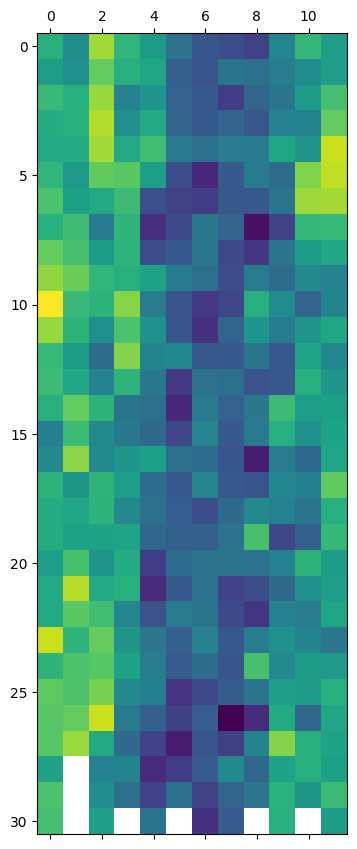

In [44]:
# Create a heat map of monthly data
# where each column represents one month, with rows representing the days of the month from 1 to 31
one_year = series.loc['1990']
groups = one_year.groupby(pd.Grouper(freq='ME'))
months = pd.concat([pd.DataFrame(x[1].values.ravel()) for x in groups], axis=1)
months.columns = range(1, 13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

### 5. Lag Scatter Plots

It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled.

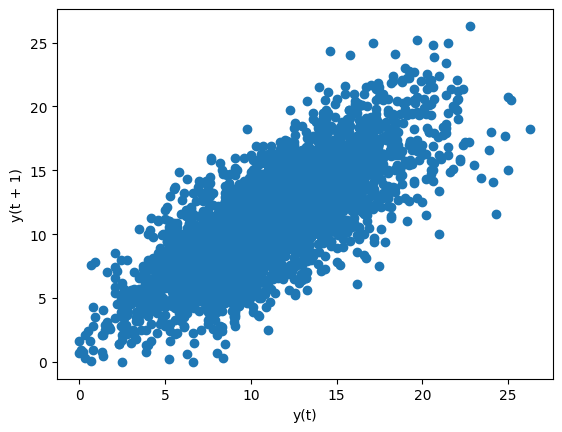

In [45]:
# Create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

<Figure size 640x480 with 0 Axes>

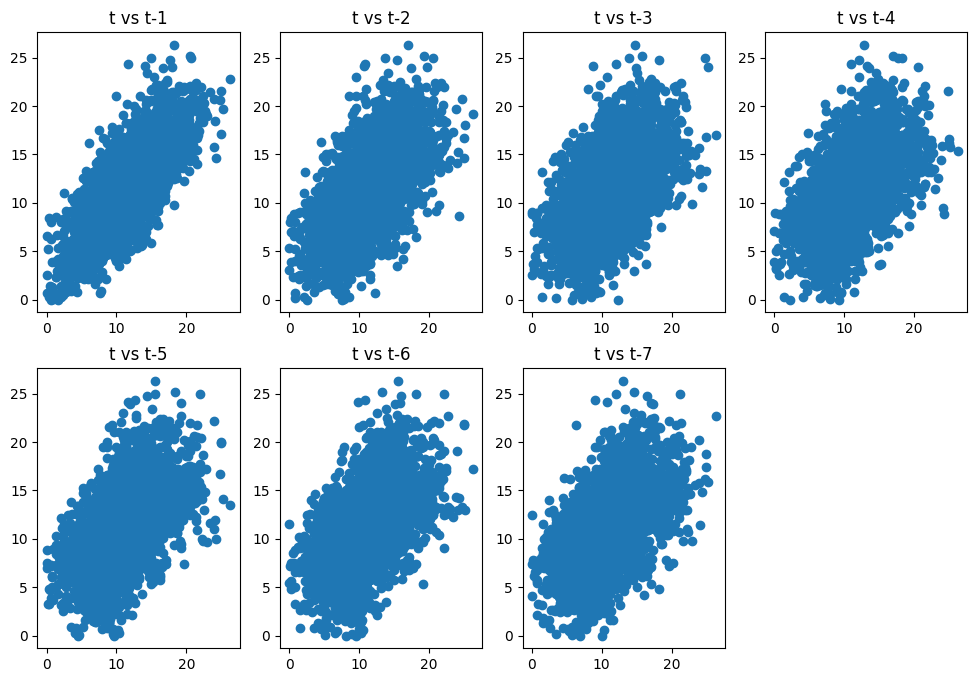

In [51]:
# Create multiple scatter plots
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1, (lags+1)):
  columns.append(values.shift(i))
df = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1, (lags+1)):
  columns.append('t-' + str(i))
df.columns = columns
plt.figure(1)
plt.figure(figsize=(12, 8))
for i in range(1, (lags+1)):
  plt.subplot(240 + i)
  plt.title('t vs t-' + str(i))
  plt.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
plt.show()

### 6. Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation

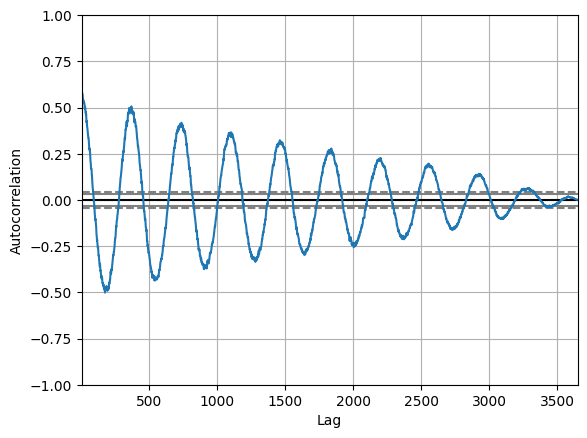

In [53]:
# Create an autocorrelatin plot
# The resulting plot shows lag along the x-axis and the correlation on the y-axis
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen
in this example are a strong sign of seasonality in the dataset.